In [27]:
import pandas as pd
import numpy as np
import re
from ast import literal_eval

from scipy.stats import shapiro
from scipy.stats import spearmanr

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
file = '../data/spain-red'
df = pd.read_csv(file + '.csv', converters={'foods': literal_eval, 'highlights': literal_eval})

In [3]:
diacritics = {'&#237;': 'í', '&#243;': 'ó', '&#250;': 'ú', '&#241;': 'ñ', '&#232;': 'è', \
    '&#8364;': '€', '&#193;': 'Á', '&#192;': 'À', '&#233;': 'é', '&#224;': 'à', \
    '&#239;': 'ï', '&#231;': 'ç', '&#193;': 'Á', '&#252;': 'ü', '&#225;': 'á', '&#186;': 'º', \
    '&#244;': 'ô', '&#8217;': '’', '&#960;': 'π', '&#210;': 'Ò'}
df.replace(diacritics, regex=True, inplace=True)
df['winery'] = df['winery'].apply(lambda x: re.sub(r'((?<=[a-z_à-ÿ])[A-Z]|(?<!\A)[A-Z](?=[a-z_à-ÿ]))', r' \1', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub(r'((?<=[a-z_à-ÿ])[A-Z]|(?<!\A)[A-Z](?=[a-z_à-ÿ]))', r' \1', x))
df['region'] = df['region'].apply(lambda x: re.sub(r'((?<=[a-z_à-ÿ])[A-Z]|(?<!\A)[A-Z](?=[a-z_à-ÿ]))', r' \1', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub(r"(\S)\(", r'\1 (', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub('\(\s*(.*?)\s*\)', r'(\1)', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub(r"([0-9]+(\.[0-9]+)?)",r" \1 ", x).strip())
df['vintage'] = df['vintage'].replace(r'\s+', ' ', regex=True)

numeric_columns = ['year', 'rating', 'ratings_count', 'country_rank', 'region_rank', \
                   'winery_rank', 'global_rank', 'alcohol', 'body', 'acidity', 'price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df = df.drop(['drink_from', 'drink_until'], axis = 1)

In [4]:
df.describe()

,year,rating,ratings_count,country_rank,region_rank,winery_rank,global_rank,alcohol,body,acidity,price
count,2014.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,1656.000000,1900.000000,1900.000000,2013.000000
mean,2014.128600,4.147992,744.478433,3.930590,5.692117,15.629152,4.140803,14.081582,4.271579,2.963158,87.068867
std,6.252022,0.244010,1714.883180,3.456955,5.452801,12.844511,3.426670,1.634316,0.507897,0.188424,234.235746
min,1964.000000,3.700000,25.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,4.900000
25%,2013.000000,3.900000,86.000000,1.000000,2.000000,6.000000,1.000000,14.000000,4.000000,3.000000,18.950000
50%,2016.000000,4.100000,227.000000,3.000000,4.000000,12.000000,3.000000,14.500000,4.000000,3.000000,31.130000
75%,2017.000000,4.300000,659.000000,5.000000,8.000000,22.000000,6.000000,14.500000,5.000000,3.000000,61.950000
max,2020.000000,4.900000,32378.000000,22.000000,38.000000,81.000000,20.000000,16.500000,5.000000,3.000000,3404.940000


In [23]:
stat, p = shapiro(df['rating'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

stat=0.943, p=0.000



In [21]:
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Probably not Gaussian


In [26]:
df.corr(method='spearman')

,year,rating,ratings_count,country_rank,region_rank,winery_rank,global_rank,alcohol,body,acidity,price
year,1.000000,-0.321934,0.014126,0.280210,0.241985,0.149130,0.290808,0.107441,0.111570,0.006951,-0.492367
rating,-0.321934,1.000000,-0.133982,-0.839422,-0.698224,-0.316268,-0.854556,0.167142,0.130101,-0.027448,0.762198
ratings_count,0.014126,-0.133982,1.000000,-0.288074,-0.206691,-0.088453,-0.260282,-0.044829,0.113782,0.026892,-0.178474
country_rank,0.280210,-0.839422,-0.288074,1.000000,0.795295,0.391337,0.985490,-0.161980,-0.131004,0.021360,-0.598353
region_rank,0.241985,-0.698224,-0.206691,0.795295,1.000000,0.547022,0.800327,-0.078282,-0.016344,0.060616,-0.447994
winery_rank,0.149130,-0.316268,-0.088453,0.391337,0.547022,1.000000,0.393294,0.014065,0.041363,0.045056,-0.052677
global_rank,0.290808,-0.854556,-0.260282,0.985490,0.800327,0.393294,1.000000,-0.163564,-0.130495,0.020221,-0.618869
alcohol,0.107441,0.167142,-0.044829,-0.161980,-0.078282,0.014065,-0.163564,1.000000,0.199177,0.007721,0.095341
body,0.111570,0.130101,0.113782,-0.131004,-0.016344,0.041363,-0.130495,0.199177,1.000000,0.112068,0.062939
acidity,0.006951,-0.027448,0.026892,0.021360,0.060616,0.045056,0.020221,0.007721,0.112068,1.000000,-0.023272


In [32]:
# test correlation
corr, pvalue = spearmanr(df['rating'], df['price'], nan_policy='omit')
print('Correlation coefficient:', corr)
print('P-value:', pvalue)

Correlation coefficient: 0.762197851487197
P-value: 0.0


In [35]:
plot_color = '#ad1a33'

<IPython.core.display.Javascript object>


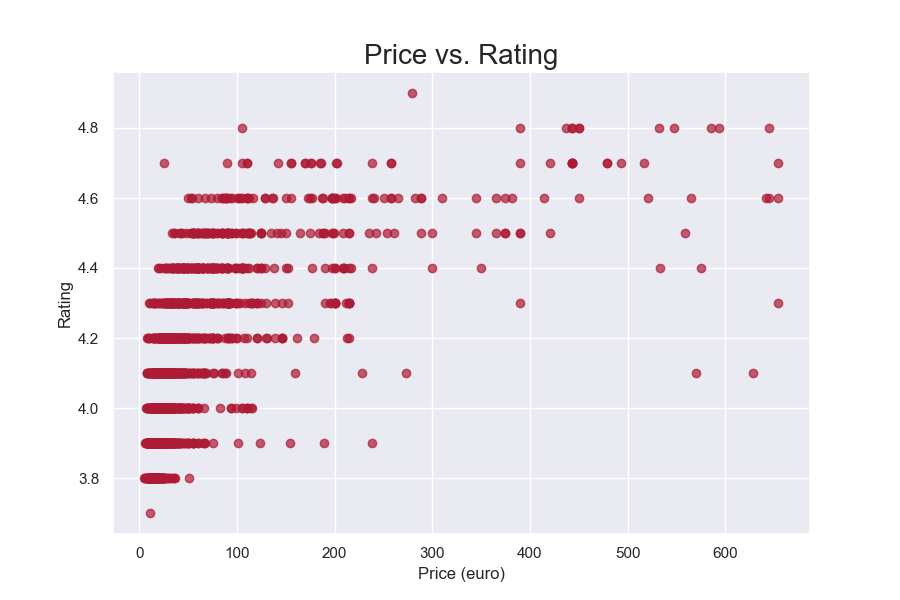

In [39]:
fig, ax = plt.subplots(figsize=(9,6))
rate_price = df[(df['price'] < 800) & (df['rating'] != None)]

x = rate_price['price']
y = rate_price['rating']

ax.scatter(x, y, color = plot_color, alpha=.7)

# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# ax.plot(x, p(x),color='grey', linewidth=1, linestyle=':')

plt.xlabel('Price (euro)')
plt.ylabel('Rating')
plt.title('Price vs. Rating', fontsize = 20)
plt.savefig('images/price_vs_rating.png')